In [3]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed

Populating the interactive namespace from numpy and matplotlib


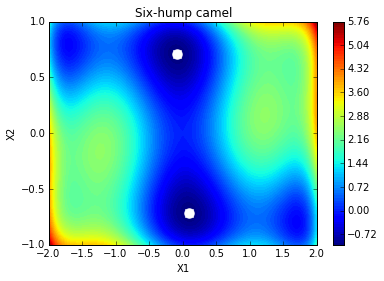

In [4]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

# GP

In [3]:
# Creates three identical objects that we will later use to compare the optimization strategies 
# myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
#                                               domain=bounds,
#                                               model_type = 'deepGP',
#                                               acquisition_type='EI',  
#                                               normalize_Y = True,
#                                               acquisition_weight = 0.1)  

myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1)  

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [4]:
# runs the optimization for the three methods
max_iter = 20  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

   ** Maximum number of iterations reached **


In [6]:
print myBopt2D.model.model


Name : GP regression
Objective : 15.0559878213
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  Mat32.variance           |     1.47828824076  |      +ve      |        
  Mat32.lengthscale        |    0.659654659908  |      +ve      |        
  Gaussian_noise.variance  |  0.00260987923622  |      +ve      |        


# DeepGP

In [8]:
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
# f_true.plot()
# Creates three identical objects that we will later use to compare the optimization strategies 

#### The arguments below are not passed to deepGP because the parent class does not propagate them.
### check the modular demo.
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              initial_design_numdata = 50,
                                              model_type = 'deepGP',
                                              acquisition_type='EI',  
                                              normalize_Y = False,
                                              acquisition_weight = 0.1)

** GPyOpt Bayesian Optimization class initialized succesfuly **


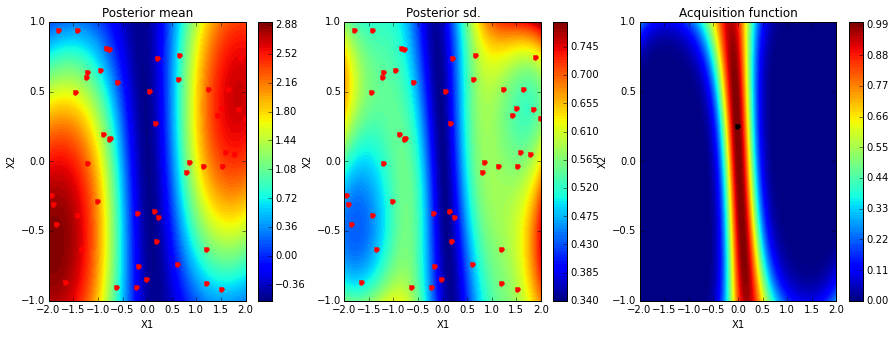

In [9]:
myBopt2D.plot_acquisition()

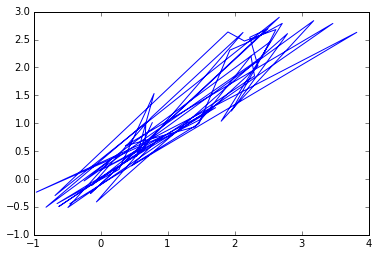

In [10]:
plt.plot(myBopt2D.Y,myBopt2D.model.predict(myBopt2D.X)[0])

In [4]:
print myBopt2D.model.model


Name : deepgp
Objective : 7.86267021363
Number of Parameters : 32
Number of Optimization Parameters : 32
Updates : True
Parameters:
  deepgp.                           |             value  |  constraints  |  priors
  obslayer.inducing inputs          |            (5, 1)  |               |        
  obslayer.rbf.variance             |    0.435285285923  |      +ve      |        
  obslayer.rbf.lengthscale          |    0.603210245121  |      +ve      |        
  obslayer.Gaussian_noise.variance  |    0.889737968614  |      +ve      |        
  obslayer.latent space.mean        |            (5, 1)  |               |        
  obslayer.latent space.variance    |            (5, 1)  |      +ve      |        
  layer_1.inducing inputs           |            (5, 2)  |               |        
  layer_1.rbf.variance              |  0.00046948804192  |      +ve      |        
  layer_1.rbf.lengthscale           |              (2,)  |      +ve      |        
  layer_1.Gaussian_noise.variance   |

In [ ]:
# runs the optimization for the three methods
max_iter = 3  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

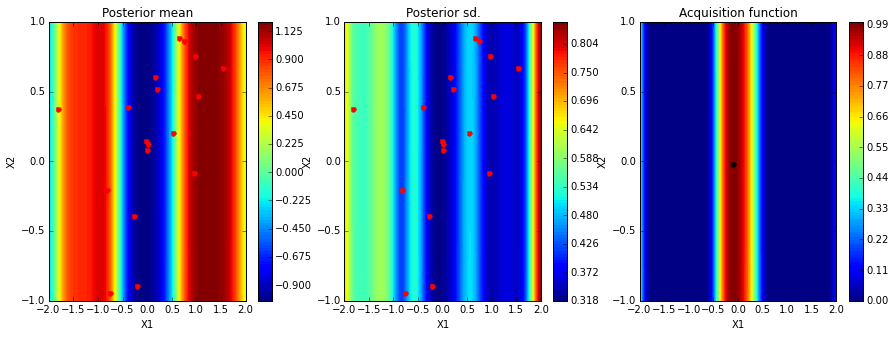

In [10]:
myBopt2D.plot_acquisition()

In [21]:
myBopt2D.model.kernel[0][:]

array([ 1.13032995,  0.6229039 ])